In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [104]:
df=pd.read_csv('fichier.csv')
df.head()
df = df[df.default_flag == 1]

C:\Users\romai\AppData\Local\Temp\ipykernel_13972\2533165777.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fichier.csv')


## Partie Lise

In [105]:
dfl = df


## Partie Romain

In [106]:

dfr = df[["pl_name","hostname","default_flag","sy_snum","sy_pnum","rowid","pl_refname","pl_orbper","pl_orbsmax","pl_rade","pl_bmasse","pl_orbeccen"]]
dfr.rename(axis="columns", mapper={"pl_name":"nom","pl_orbper":"période_orbite","pl_orbsmax":"demi_grand_axe","pl_rade":"rayon","pl_bmasse":"masse","pl_orbeccen":"excentricité"},inplace=True)

C:\Users\romai\AppData\Local\Temp\ipykernel_13972\830225641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.rename(axis="columns", mapper={"pl_name":"nom","pl_orbper":"période_orbite","pl_orbsmax":"demi_grand_axe","pl_rade":"rayon","pl_bmasse":"masse","pl_orbeccen":"excentricité"},inplace=True)


In [107]:
dfr.describe()

,default_flag,sy_snum,sy_pnum,rowid,période_orbite,demi_grand_axe,rayon,masse,excentricité
count,5535.0,5535.000000,5535.000000,5535.000000,5.287000e+03,3318.000000,4173.000000,2488.000000,2185.000000
mean,1.0,1.102078,1.770009,15493.401987,8.088392e+04,10.374148,4.271998,764.568608,0.156389
std,0.0,0.339360,1.146499,11858.577474,5.531259e+06,169.371181,4.743108,1418.769337,0.185088
min,1.0,1.000000,1.000000,3.000000,9.070629e-02,0.004400,0.310000,0.020000,0.000000
25%,1.0,1.000000,1.000000,3935.500000,4.460639e+00,0.055900,1.593000,14.987500,0.014000
50%,1.0,1.000000,1.000000,13756.000000,1.155562e+01,0.118900,2.380000,204.046350,0.091000
75%,1.0,1.000000,2.000000,26968.500000,4.139416e+01,0.850000,3.690000,742.133050,0.224000
max,1.0,4.000000,8.000000,35115.000000,4.020000e+08,7506.000000,77.342000,9534.900000,0.950000


Les données sont très dispersées (les écarts-types sont parfois un ordre de grandeur supérieur à la moyenne !), on va donc passer en échelle logarithmique pour les représenter, et ensuite prendre la partie entière.

In [108]:
dfr["demi_grand_axe_log"] = np.log10(dfr.demi_grand_axe)

dfr["période_orbite_log"] = np.log10(dfr.période_orbite)

C:\Users\romai\AppData\Local\Temp\ipykernel_13972\1543110526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["demi_grand_axe_log"] = np.log10(dfr.demi_grand_axe)
C:\Users\romai\AppData\Local\Temp\ipykernel_13972\1543110526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["période_orbite_log"] = np.log10(dfr.période_orbite)


### Demi grand axes des orbites des planètes

<Axes: >

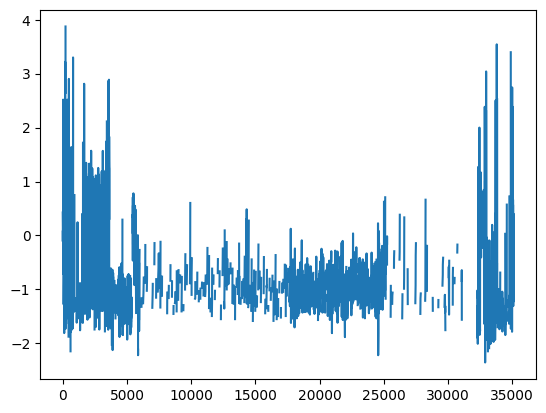

In [109]:
dfr.demi_grand_axe_log.plot()

On va essayer de regrouper les $\log$ des demi-grands axes. On va, par souci de simplicité, prendre la partie entière du $\log$, afin d'avoir des ordres de grandeur en puissance de 10.

In [110]:
dfr.demi_grand_axe_log.value_counts()

demi_grand_axe_log
-1.221849    20
-1.318759    15
-1.301030    15
-1.167491    15
-1.096910    15
             ..
 0.258637     1
 0.081707     1
 0.674402     1
 0.052694     1
-0.204120     1
Name: count, Length: 1991, dtype: int64

C:\Users\romai\AppData\Local\Temp\ipykernel_13972\2726189436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.demi_grand_axe_log = dfr.demi_grand_axe_log//1


<Axes: xlabel='demi grand axe (en unités astronomiques) en échelle logarithmique', ylabel='nombre de planètes'>

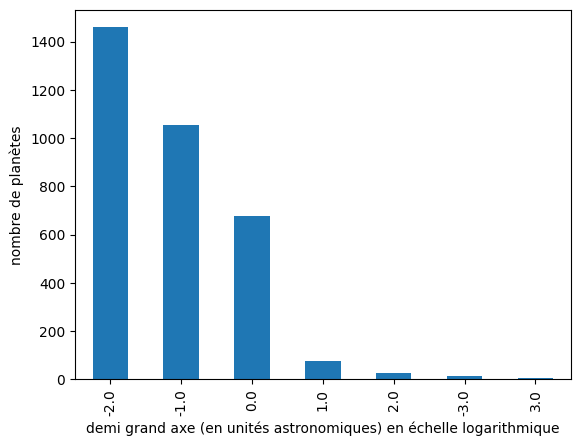

In [116]:
dfr.demi_grand_axe_log = dfr.demi_grand_axe_log//1
dfr.demi_grand_axe_log.value_counts().plot(kind = "bar",ylabel="nombre de planètes",xlabel="demi grand axe (en unités astronomiques) en échelle logarithmique")

On remarque qu'il y a jusqu'à 5 ordres de grandeurs d'écart entre les différentes orbites des planètes ! Ceci témoigne la diversité des systèmes planétaires. Notons toutefois que les demi grand axes des orbites sont souvent de l'ordre de grandeur de l'orbite terrestre (lorsque le $\log$ vaut 0), ou sont $100$ fois inférieures. Les "grandes" orbites sont rares. Ce sont elles qui augmentent la moyenne et l'écart-type des orbites quand on fait un `describe`.

### Période des orbites

On effectue le même traitement qu'avec les demi grands axes.

C:\Users\romai\AppData\Local\Temp\ipykernel_13972\3720535989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.période_orbite_log = dfr.période_orbite_log//1


<Axes: xlabel='période_orbite_log'>

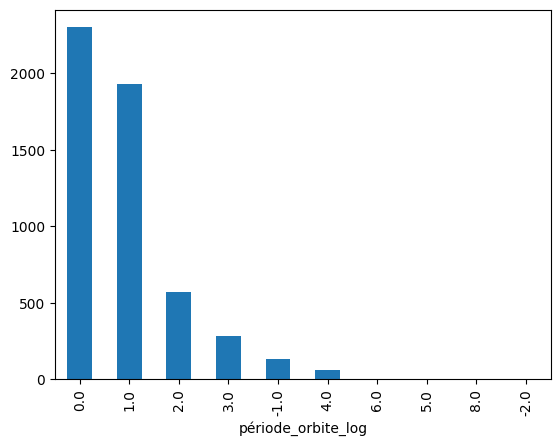

In [115]:
dfr.période_orbite_log = dfr.période_orbite_log//1
dfr.période_orbite_log.value_counts().plot(kind = "bar")

Avec une pie :

<Axes: ylabel='count'>

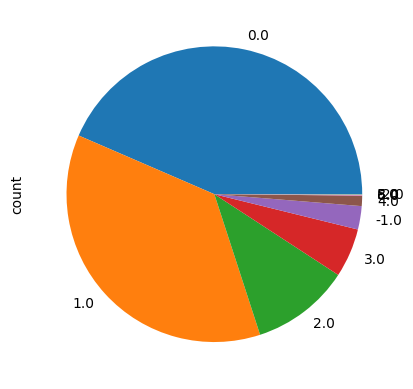

In [117]:
dfr.période_orbite_log.value_counts().plot(kind = "pie")

Presque la moitié des révolutions ont une durée de l'ordre de l'année, environ 1/3 ont une durée de l'ordre de la dizaine d'années.

On retient donc qu'il y a pour la moitié de cas une similitude avec le cas terrestre.

### Masse des planètes

La masse est donnée en masse terrestre (1 = la masse de la Terre).

In [119]:
dfr.masse.describe()

count    2488.000000
mean      764.568608
std      1418.769337
min         0.020000
25%        14.987500
50%       204.046350
75%       742.133050
max      9534.900000
Name: masse, dtype: float64

Encore une fois, il y a de grandes disparités dans les masses. L'écart-type est deux fois supérieur à la moyenne. Notons toutefois qu'ici, la Terre est une planète "légère" : elle se situe dans le premier quartile.

<Axes: >

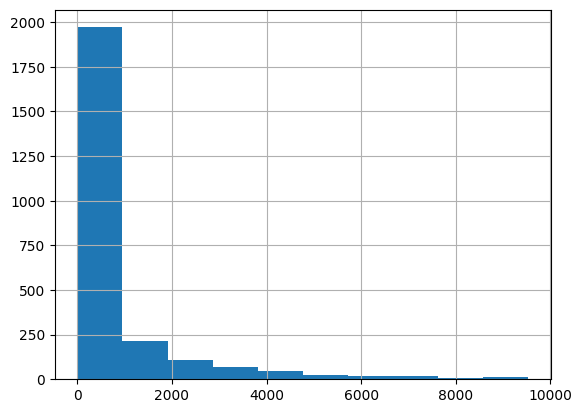

In [120]:
dfr.masse.hist()

Encore une fois, nous avons affaire à des disparités dans les ordres de grandeur. Passons à une échelle logarithmique.

In [123]:
dfr.masse_log = np.log10(dfr.masse)

<Axes: >

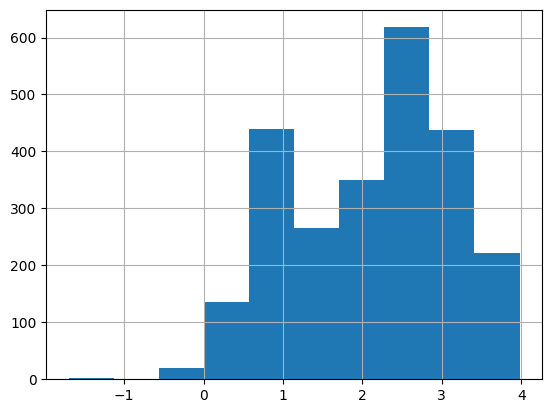

In [124]:
dfr.masse_log.hist()

La répartition logarithmique est quasiment gaussienne, mais centrée vers entre 2 et 3 : en moyenne, les planètes sont 100 à 1000 mois plus lourdes que la Terre.

## Partie Ombline

In [ ]:
dfo = df


### Étude des températures des planètes ###

In [ ]:
temperature = dfo["st_teff"]

Regardons quelle est la tendance de température des planètes.

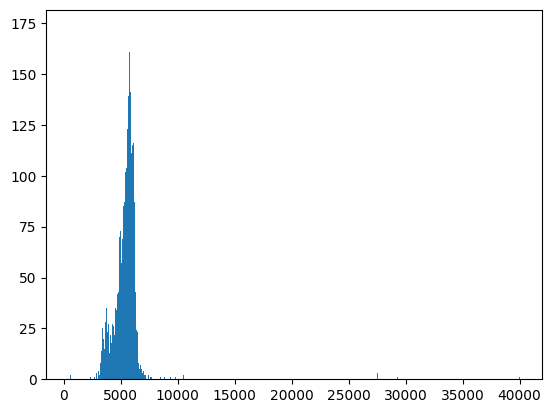

In [ ]:
plt.hist(temperature, bins=1000)
plt.show()

On voit qu'une température est privilégiée, regardons laquelle.

In [ ]:
temperature.describe()

count     4929.00000
mean      5420.06057
std       1507.13282
min        415.00000
25%       4953.00000
50%       5556.00000
75%       5904.00000
max      40000.00000
Name: st_teff, dtype: float64

On lit que la moyenne de température est de 5420.06057 K.
Étudions à présent le rayon des planètes.

### Étude du rayon des planètes

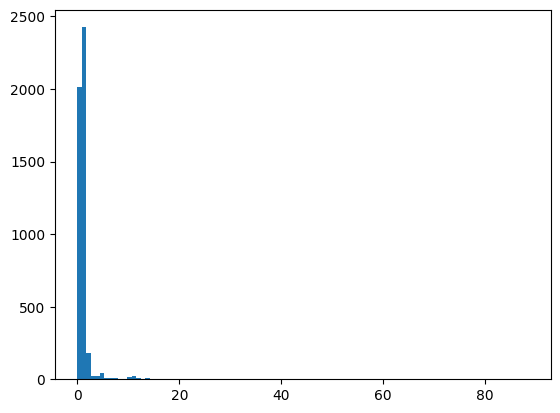

In [ ]:
rayon = dfo["st_rad"]
plt.hist(rayon, bins = 100)
plt.show()

On voit qu'il y a peu de données au dessus de 20 rayons du Soleil.
On va donc afficher un histogramme qui ne prend en compte que les données en dessous de cette valeur.

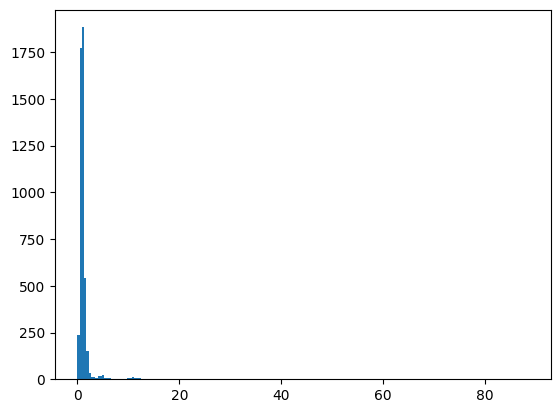

In [ ]:
plt.hist(rayon, bins=200, )
plt.show()

# comment faire ?


Regardons à présent de manière générale les données relatives au rayon des planètes.

In [ ]:
rayon.describe()

count    4839.000000
mean        1.517778
std         3.909116
min         0.010000
25%         0.780000
50%         0.950000
75%         1.240000
max        88.470000
Name: st_rad, dtype: float64

### Étude de la masse des planètes

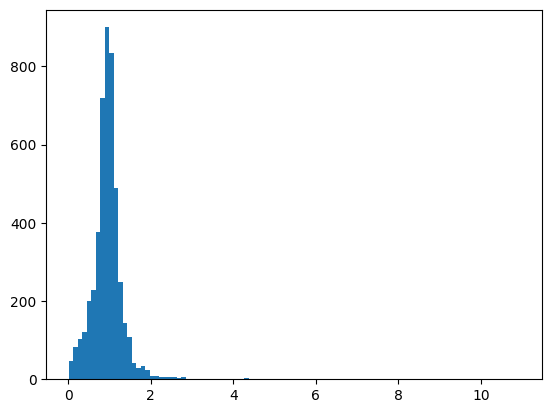

In [ ]:
masse = dfo["st_mass"]
plt.hist(masse, bins = 100)
plt.show()

On voit qu'une masse est privilégiée, regardons laquelle.

In [ ]:
masse.describe()

count    4787.000000
mean        0.955997
std         0.448734
min         0.010000
25%         0.780000
50%         0.950000
75%         1.100000
max        10.940000
Name: st_mass, dtype: float64

On lit que la moyenne de masse est 0.955997 la masse du Soleil.

### Étude de la métallicité des planètes

*Métallicité : (d'un objet astronomique) la fraction de sa masse qui n'est pas constituée d'hydrogène ou d'hélium*

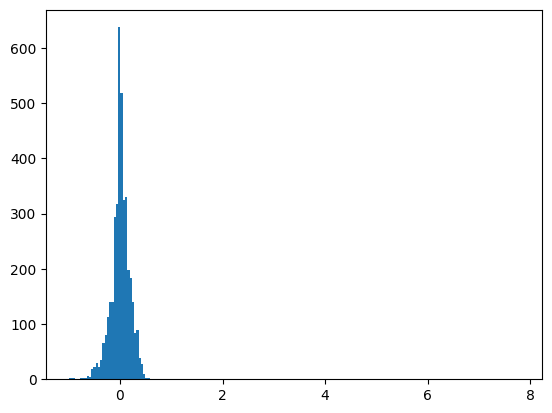

In [ ]:
metal = dfo["st_met"]
plt.hist(metal, bins = 200)
plt.show()

On voit que la métallicité des planètes se concentre autour d'une valeur.

In [ ]:
metal.describe()

count    3885.000000
mean        0.010949
std         0.221377
min        -1.000000
25%        -0.080000
50%         0.016000
75%         0.119000
max         7.790000
Name: st_met, dtype: float64

Cette valeur est 0,011. Les planètes sont donc en majorité constituées principalement d'hélium et d'hydrogène.

## Partie Camille

In [ ]:
dfc = df
par_etoile=df.groupby(by='hostname')
dfc_entité=dfc[['pl_name', 'hostname', 'sy_snum', 'sy_pnum', ]]
dfc_entité

,pl_name,hostname,sy_snum,sy_pnum
2,11 Com b,11 Com,2,1
3,11 UMi b,11 UMi,1,1
6,14 And b,14 And,1,1
11,14 Her b,14 Her,1,2
22,16 Cyg B b,16 Cyg B,3,1
...,...,...,...,...
35096,ups And b,ups And,2,3
35103,ups And c,ups And,2,3
35108,ups And d,ups And,2,3
35111,ups Leo b,ups Leo,1,1


Analysons la répartion du nombre d'étoilespar système solaire

<Axes: xlabel='sy_snum'>

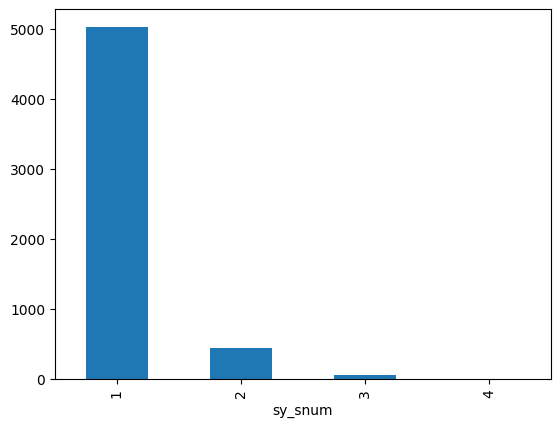

In [ ]:
dfc_entité.sy_snum.value_counts().plot(kind='bar')

On peut voir que le nombre de système avec 1 étoile est très majoriaire et que les systèmes avec 4 étoiles sont extras rares

In [ ]:
dfc_entité.sy_snum.describe()

count    5535.000000
mean        1.102078
std         0.339360
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: sy_snum, dtype: float64

In [ ]:
dfc_entité[dfc_entité.sy_snum ==4]

,pl_name,hostname,sy_snum,sy_pnum
48,30 Ari B b,30 Ari B,4,1
32869,PH1 b,PH1,4,1


Cela vient confirmer ce qu'on a vu précédemment plus de 75% des systèmes ont une seule étoile et on remarque que seulement 2 planètes  parmi les planètes découvertes appartiennent à un système à 4 étoiles

Analysons maintenant le nombres de planètes par systèmes

<Axes: xlabel='sy_pnum'>

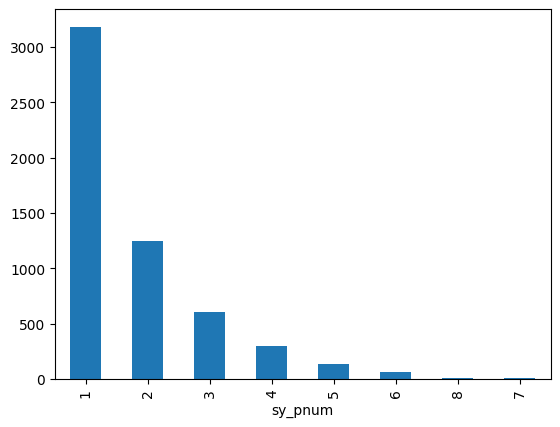

In [ ]:
dfc_entité.sy_pnum.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

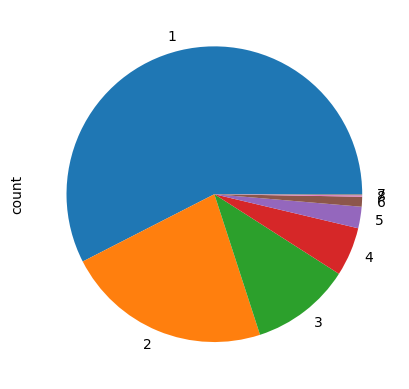

In [ ]:
dfc_entité.sy_pnum.value_counts().plot(kind='pie')

In [ ]:
dfc_entité.sy_pnum.describe()

count    5535.000000
mean        1.770009
std         1.146499
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: sy_pnum, dtype: float64

On remarque qu'encore un fois que les système avec une seule planète sont majoritaires